### 1.Inspiration /Problem Statement:The goal is to use best regression model and predict car price prediction.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
import os
#Setting current working directory
os.chdir("/Users/Zahed/Car Price Project")

### car data from carsdekho.com

In [3]:
df=pd.read_csv("car data.csv")
pd.set_option('display.max_columns',None)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### Exploratory data analysis

In [5]:
#Shape of data 
print(df.shape)
#dtypes of data 
print(df.dtypes)

(301, 9)
Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object


In [6]:
# Info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# value_counts
df["Owner"].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

In [8]:
# checking the number of missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [10]:
# checking the distribution of categorical data
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


### Data Transformation

In [11]:
# encoding "Fuel_Type" Column
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding "Seller_Type" Column
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding "Transmission" Column
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [12]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


### Visualization for dataset

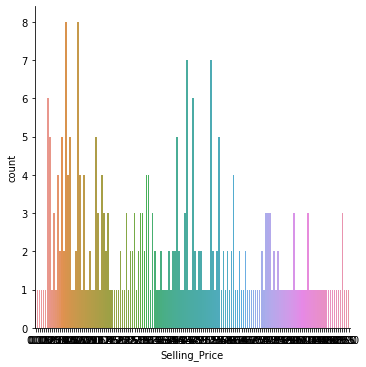

In [13]:
# number of values for each quality
sns.catplot(x='Selling_Price', data = df, kind = 'count')

<AxesSubplot:xlabel='Selling_Price', ylabel='Owner'>

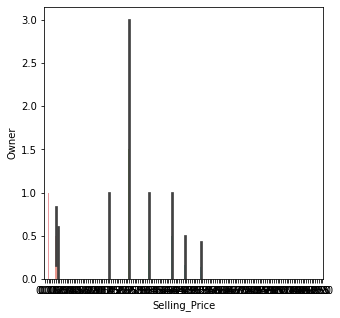

In [14]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='Selling_Price', y = 'Owner', data = df)

In [15]:
# describe data
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.212625,0.352159,0.132890,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.425801,0.478439,0.340021,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,1.000000,0.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,2.000000,1.000000,1.000000,3.000000


### Checking for outliers

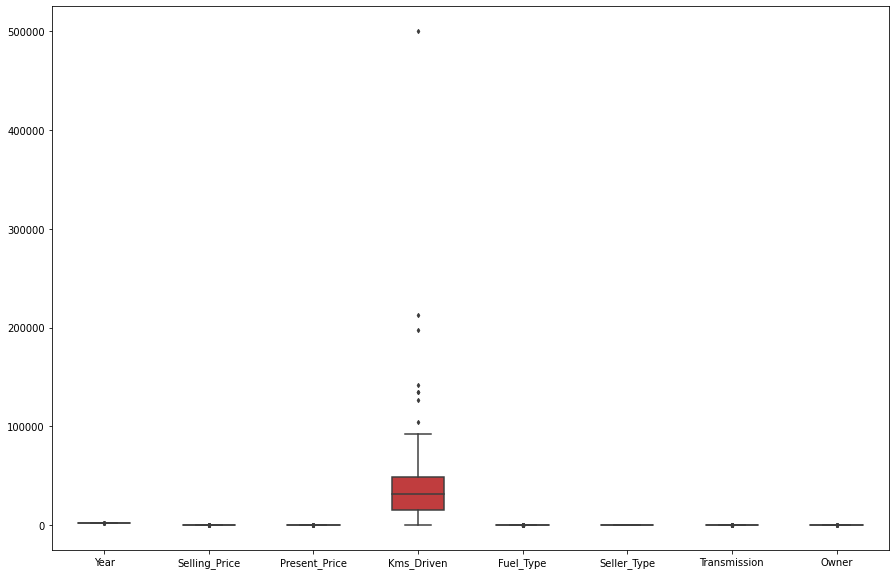

In [16]:
#Checking for outlier 
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

In [18]:
# Removing Outliers 
outlier = df['Kms_Driven'].quantile(0.95)
# removing the top 5% data from Insulin column
df = df[df['Kms_Driven']<outlier]

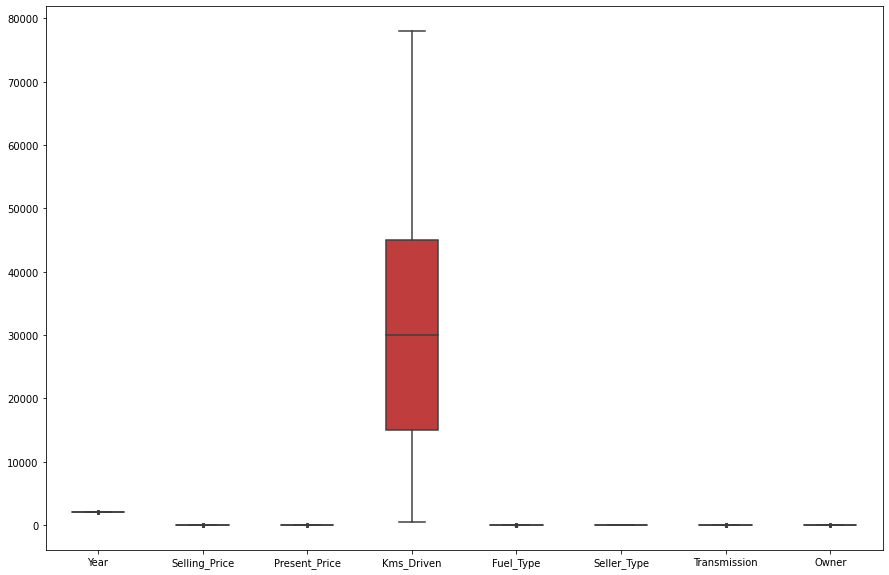

In [19]:
# Checking again for outliers
fig, ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data = df, width = 0.5, ax = ax, fliersize = 3)
plt.show()

### Model Preparation

In [20]:
X = df.drop(['Car_Name','Selling_Price'],axis=1)
y = df['Selling_Price']

In [21]:
print(X.shape)
print(y.shape)

(285, 7)
(285,)


In [22]:
print(X)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
295  2015          13.09       60076          1            0             0   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [23]:
# train_test_spilt
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)
print("The shape of X_train is", X_train.shape )
print("The shape of X_test is", X_test.shape)
print("The shape of y_train is", y_train.shape)
print("The shape of y_test is", y_test.shape)

The shape of X_train is (228, 7)
The shape of X_test is (57, 7)
The shape of y_train is (228,)
The shape of y_test is (57,)


### Model Training
We train different model after the evaluation of model we will select out best model for production.

* Linear Regression
* Polynomial Regression
* Random Forest Regressor
* XgBoost
* SVM
* Lasso Regression

### Linear Regression

In [24]:
# loading the linear regression model
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train,y_train)

LinearRegression()

### Model Evaluation of Linear Regression
* Traning Data

In [25]:
# prediction on Training data
training_data_prediction = lin_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error of train : ", error_score)

R squared Error of train :  0.9152954359781391


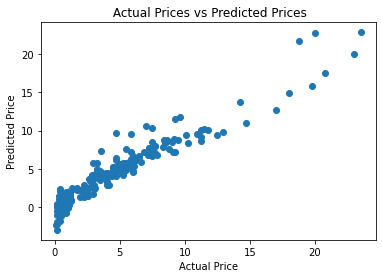

In [26]:
#Visualize the actual prices and Predicted prices of traing set
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


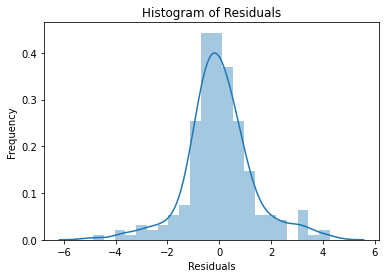

In [27]:
# Checking Normality of errors
sns.distplot(y_train-training_data_prediction)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Observation Here the residuals are normally distributed. So normality assumption is satisfied.

### Test Data

In [28]:
# prediction on testing data
test_data_prediction = lin_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error Testing Data : ", error_score)

R squared Error Testing Data :  0.8199356306372311


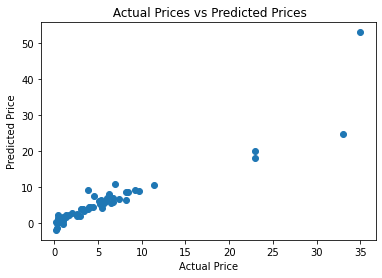

In [29]:
#Visualize the actual prices and Predicted prices of testing set
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

C:\Users\Dell\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


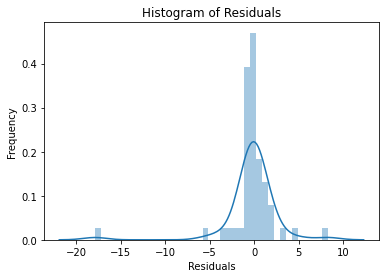

In [30]:
# Checking Normality of errors
sns.distplot(y_test-test_data_prediction)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

### Polynomial Regression

In [31]:
from sklearn.preprocessing import PolynomialFeatures

# fit into Polynomial regression
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(X_train)
poly.fit(x_poly,y_train)
# fit into linear regression
model_polynomial = LinearRegression()
model_polynomial.fit(x_poly,y_train)

LinearRegression()

### Model Evaluation of Polynomial Regression
* Traning Data

In [32]:
x_traing_poly_data = model_polynomial.predict(poly.fit_transform(X_train))
# R squared Error
error_score_poly_train = metrics.r2_score(y_train, x_traing_poly_data)
print("R squared Error Traning Data : ", error_score_poly_train)

R squared Error Traning Data :  0.9823847973981682


### Random Forest Regressor

In [33]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor()
model_reg.fit(X_train, y_train)

RandomForestRegressor()

### Model Evaluation of Random Forest Regressor
* Traning Data

In [34]:
y_random_forest_pred = model_reg.predict(X_train)
# Model Evaluation
print('R^2:',metrics.r2_score(y_train, y_random_forest_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_random_forest_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_random_forest_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_random_forest_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_random_forest_pred)))

R^2: 0.994883919159176
Adjusted R^2: 0.9947211347687861
MAE: 0.1885587719298244
MSE: 0.09928196631578931
RMSE: 0.3150904097489946


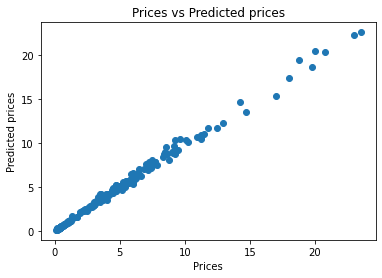

In [35]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_train, y_random_forest_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

In [36]:
# Predicting Test data with the model
y_test_pred = model_reg.predict(X_test)
# Model Evaluation
acc_rf = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_rf)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.7909695982310148
Adjusted R^2: 0.7611081122640169
MAE: 1.1286210526315792
MSE: 10.375546525263154
RMSE: 3.2211095177381277


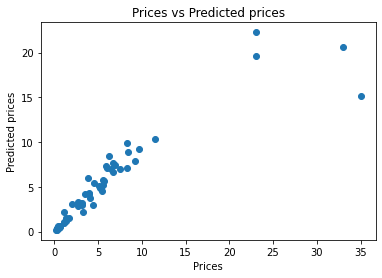

In [37]:
# Visualizing the differences between actual prices and predicted values
plt.scatter(y_test, y_test_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices")
plt.show()

### Lasso Regression

In [38]:
# loading the linear regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,y_train)

Lasso()

In [ ]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)
# R squared Error
error_score = metrics.r2_score(y_train, training_data_prediction)
print("R squared Error : ", error_score)

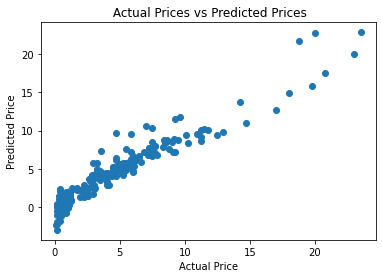

In [39]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [40]:
# prediction on Testing data
test_data_prediction = lass_reg_model.predict(X_test)
# R squared Error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.7410696261085694


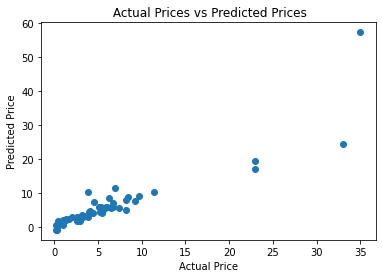

In [41]:
plt.scatter(y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()